In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pandas_datareader import data as pdr
import datetime

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
def get_variable_loadings(df_loadings):
    top5_list = []
    down5_list = []
    for i in range(1,6):
        df_aux_top = df_loadings.loc["PC" + str(i)].sort_values(ascending=False)
        df_aux_down = df_loadings.loc["PC" + str(i)].sort_values(ascending=True)
        top5_list.append(df_aux_top.iloc[:5].index.to_list())
        down5_list.append(df_aux_down.iloc[:5].index.to_list())
    df_aux_top5 = pd.DataFrame(top5_list, 
                            columns = range(1,6, 1), 
                            index = ["PC" + str(x) for x in range(1,6, 1)])
    df_aux_down5 = pd.DataFrame(down5_list, 
                            columns = range(1,6, 1), 
                            index = ["PC" + str(x) for x in range(1,6, 1)])
    return df_aux_top5, df_aux_down5


In [4]:
def get_variable_loadings(df_loadings):
    top5_list = []
    down5_list = []

    for i in range(1,6):
        df_aux_top = df_loadings.loc["PC" + str(i)].sort_values(ascending=False)
        df_aux_down = df_loadings.loc["PC" + str(i)].sort_values(ascending=True)
        df_up_info_aux = pd.DataFrame({ "word" : df_aux_top.iloc[:5].index,
                                    "place": range(1,6,1),
                                    "PCA":[f"PC{i}"] * 5})
        df_dwn_info_aux = pd.DataFrame({ "word" : df_aux_down.iloc[:5].index,
                                    "place": range(1,6,1),
                                    "PCA":[f"PC{i}"] * 5})
        top5_list.append(df_up_info_aux)
        down5_list.append(df_dwn_info_aux)

    df_aux_top5 = pd.concat(top5_list)
    df_aux_down5 = pd.concat(down5_list)

    return df_aux_top5, df_aux_down5


# Project

## 1. Data Cleaning

In [5]:
# path = 'data/trends_final_clean_demoe.xlsx'
# sheet_name = "treds_nocompany"
# df_words = pd.read_excel(path, sheet_name = sheet_name)
# df_words["date"] = pd.to_datetime(df_words["date"])
# df_words.set_index("date", inplace = True)
# display(df_words)

In [6]:
#Downloading information
path = 'data/trends_final_clean.csv'
#path = 'data/trends_weekly_combined.csv'


df_words = pd.read_csv(path)
df_words["date"] = pd.to_datetime(df_words["date"])
df_words.set_index("date", inplace = True)
display(df_words)

,5g,advertising,aerospace,airlines,alphabet,aluminum,amazon stock,amd stock,api,apple iphone,...,trucking,vaccines,video games,wall street,walmart grocery,waste management,water bill,weight loss,wireless,zinc
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,4.761905,42.857143,14.285714,770.000000,52.380952,76.190476,9.523810,0.000000,52.380952,52.380952,...,42.857143,9.523810,42.857143,52.380952,4.761905,23.809524,19.047619,152.380952,365.000000,23.809524
2016-02-01,5.555556,61.111111,16.666667,887.500000,77.777778,105.555556,11.111111,0.000000,72.222222,66.666667,...,55.555556,16.666667,50.000000,61.111111,5.555556,38.888889,22.222222,183.333333,429.411765,33.333333
2016-03-01,7.692308,76.923077,23.076923,1233.333333,92.307692,153.846154,7.692308,7.692308,107.692308,100.000000,...,76.923077,23.076923,61.538462,76.923077,7.692308,30.769231,30.769231,246.153846,591.666667,46.153846
2016-04-01,9.090909,90.909091,27.272727,1440.000000,109.090909,181.818182,18.181818,9.090909,118.181818,100.000000,...,90.909091,27.272727,72.727273,90.909091,9.090909,45.454545,36.363636,281.818182,618.181818,45.454545
2016-05-01,10.000000,90.000000,30.000000,1600.000000,110.000000,200.000000,20.000000,10.000000,130.000000,110.000000,...,100.000000,30.000000,80.000000,90.000000,10.000000,50.000000,40.000000,320.000000,700.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,50.000000,33.333333,20.833333,545.454545,58.333333,100.000000,33.333333,29.166667,116.666667,62.500000,...,37.500000,33.333333,29.166667,29.166667,4.166667,25.000000,29.166667,145.833333,200.000000,33.333333
2025-09-01,45.454545,40.909091,22.727273,540.000000,68.181818,109.090909,31.818182,22.727273,113.636364,113.636364,...,36.363636,54.545455,31.818182,36.363636,4.545455,22.727273,36.363636,150.000000,200.000000,40.909091
2025-10-01,32.142857,32.142857,17.857143,392.307692,57.142857,85.714286,32.142857,39.285714,96.428571,60.714286,...,28.571429,32.142857,25.000000,28.571429,3.571429,17.857143,28.571429,110.714286,148.148148,32.142857


In [7]:
#Sanity check NAs
df_words.isna().any().any()

np.False_

In [8]:
#Sanity check, number of 0
(df_words == 0).sum().sum() * 100 / (df_words.shape[0] * df_words.shape[1])

np.float64(1.6338951310861423)

In [9]:
df_words.shape

(120, 178)

In [10]:
#Manually checking columns
no_company = True
no_company_stocks = False
no_others = True

company = ["alphabet", "chevron", "comcast", "exxon","meta", "redfin", "spotify"]
company_stocks = ["amazon stock", "amd stock", "apple stock", "google stock", "nvidia stock", "tesla stock"]
others = ["apple iphone", "disney plus", "google search", "ozempic", "paramount plus", "tiktok", "walmart grocery"]
# --- Energy ---
# Chevron: Energy (oil and gas)
# Exxon Mobil: Energy (integrated oil)

# --- Information Technology ---
# AMD: Information Technology (semiconductors)
# Apple: Information Technology (hardware and software)

# --- Communication Services ---
# Alphabet: Communication Services (internet and advertising)
# Comcast: Communication Services (cable and media)
# Disney: Communication Services (entertainment and streaming)
# Spotify: Communication Services (music streaming)

# --- Utilities ---
# Duke Energy: Utilities (regulated electricity)

# --- Real Estate ---
# Redfin: Real Estate (digital brokerage)

# --- Consumer Staples ---
# Walmart: Consumer Staples (food retail)
if no_company:
    df_words = df_words.drop(columns = company)
if no_company_stocks:
    df_words = df_words.drop(columns = company_stocks)
if no_others:
    df_words = df_words.drop(columns = others)


In [11]:
#Changing plural to singulars
sin_plurals = {"credit cards":"credit card",
               "gas prices":"gas price", 
               "gold":"gold price",
               "oil prices": 'oil price',
               "pharmaceuticals" : "pharmaceutical",
               "great depression": "the depression"}
df_long = (
    df_words
    .reset_index()                              
    .melt(id_vars="date",                       
          var_name="category",                  
          value_name="value")                   
    .sort_values(["date", "category"])
    .reset_index(drop=True)
)
df_long["category"] = df_long["category"].replace(sin_plurals)

df_words = pd.pivot_table(df_long, index = "date", columns = "category", values = "value", aggfunc = "sum")

In [12]:
df_words.shape

(120, 158)

## 2. Principal Component Analysis

### a) In the sample analysis

In [13]:
X_full_sample = df_words.to_numpy()

In [14]:
# Pipeline
# First, standarize data, then apply PCA
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA())
])

# Fit
pca_model = pca_pipeline.fit_transform(X_full_sample)

# dataframe with PC values
df_pcs = pd.DataFrame(
    pca_model,
    index=df_words.index,
    columns=[f"PC{i+1}" for i in range(pca_model.shape[1])]
)

#Extracting loadings
loadings = pca_pipeline.named_steps["pca"].components_
df_loadings = pd.DataFrame(loadings, index = df_pcs.columns, columns = df_words.columns)
df_load_up, df_load_dwn = get_variable_loadings(df_loadings)

# Explained variance
explained_var = pd.Series(
    pca_pipeline.named_steps["pca"].explained_variance_ratio_,
    index=df_pcs.columns
)


display(df_pcs.head())
display(pd.DataFrame(explained_var).head(10))
display(df_load_up)
display(df_load_dwn)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-7.515352,-6.781717,-3.485978,0.512779,-1.432013,0.093330,-0.009787,2.919049,-0.063531,-0.438553,...,0.064630,0.094741,-0.003046,0.002266,0.036108,-0.012820,0.015679,0.012950,0.001316,-6.867156e-16
2016-02-01,-0.923816,-6.137120,-4.141347,0.419009,-0.815623,-1.383871,-0.460281,2.494354,-0.006949,-0.082510,...,-0.009914,0.015067,0.054949,-0.052857,0.014208,0.020671,0.014624,0.018177,0.008179,-6.867156e-16
2016-03-01,9.007491,-6.311251,-3.737030,0.535220,-0.140790,-2.374178,-0.609964,2.699602,1.176154,-0.563714,...,0.042321,-0.004328,-0.068279,-0.023615,-0.010254,-0.005478,0.001055,-0.026451,-0.010069,-6.867156e-16
2016-04-01,16.286766,-5.652502,-3.547384,0.952602,-0.616928,-3.756572,-0.166042,1.114894,2.158803,-0.071643,...,0.039643,-0.059228,-0.007436,0.029415,-0.024936,-0.023761,0.004340,-0.005043,0.002712,-6.867156e-16
2016-05-01,18.850889,-6.284655,-0.892529,0.829713,-0.960028,-2.735678,-0.507745,1.707950,2.611137,-1.855148,...,0.018531,-0.015719,0.010599,-0.000404,0.029373,0.004000,-0.016148,0.030391,0.001397,-6.867156e-16


,0
PC1,0.602699
PC2,0.127452
PC3,0.048671
PC4,0.023133
PC5,0.022131
PC6,0.018204
PC7,0.014211
PC8,0.012031
PC9,0.010246
PC10,0.009337


,word,place,PCA
0,construction,1,PC1
1,copper,2,PC1
2,aluminum,3,PC1
3,oil,4,PC1
4,manufacturing,5,PC1
0,s&p 500,1,PC2
1,gpu,2,PC2
2,nasdaq,3,PC2
3,streaming,4,PC2
4,etf,5,PC2


,word,place,PCA
0,stimulus,1,PC1
1,dow jones,2,PC1
2,tesla stock,3,PC1
3,5g,4,PC1
4,black friday,5,PC1
0,online banking,1,PC2
1,banking,2,PC2
2,cable tv,3,PC2
3,wireless,4,PC2
4,live streaming,5,PC2


### b) Out of the sample analysis

In [59]:
rolling_wdw = 52

list_pc = []
list_exp_var = []
list_var_up = []
list_var_dwn = []

for i in range(len(df_words) - rolling_wdw):
    df_words_aux = df_words.iloc[i: (i + rolling_wdw + 1), :]

    pca_pipeline_aux = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA())
    ])

    pca_model_aux = pca_pipeline_aux.fit_transform(df_words_aux.to_numpy())

    df_pcs_aux = pd.DataFrame(
        pca_model_aux,
        index=df_words_aux.index,
        columns=[f"PC{i+1}" for i in range(pca_model_aux.shape[1])]
    )

    explained_var_aux = pd.Series(
        pca_pipeline_aux.named_steps["pca"].explained_variance_ratio_,
        index=df_pcs_aux.columns
    )

    loadings_aux = pca_pipeline_aux.named_steps["pca"].components_
    df_loadings_aux = pd.DataFrame(loadings_aux, 
                           index = df_pcs_aux.columns, 
                           columns = df_words_aux.columns)
    df_load_up_aux, df_load_dwn_aux = get_variable_loadings(df_loadings_aux)
    df_load_up_aux["window"] = df_words_aux.index.max()
    df_load_dwn_aux["window"] = df_words_aux.index.max()

    list_pc.append(df_pcs_aux)
    list_exp_var.append(explained_var_aux)
    list_var_up.append(df_load_up_aux)
    list_var_dwn.append(df_load_dwn_aux)

df_var_up = pd.concat(list_var_up)
df_var_dwn = pd.concat(list_var_dwn)


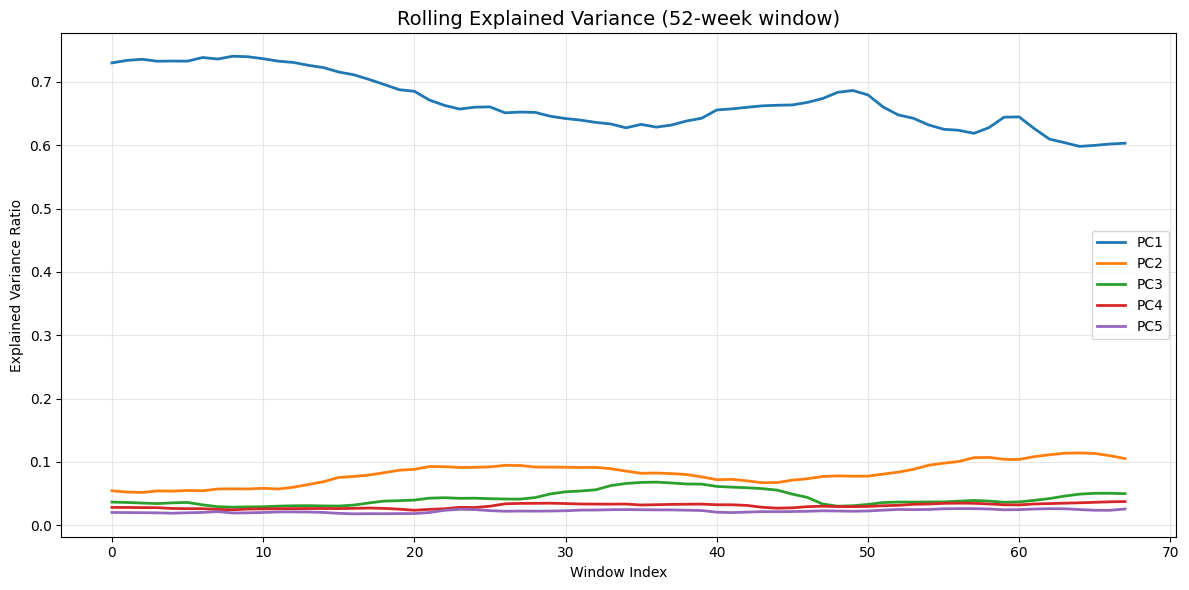

In [60]:
df_exp_var_analysis = pd.DataFrame(list_exp_var)

plt.figure(figsize=(12,6))

for col in ["PC1", "PC2", "PC3", "PC4", "PC5"]:
    plt.plot(df_exp_var_analysis.index,
             df_exp_var_analysis[col],
             linewidth=2,
             label=col)

plt.title("Rolling Explained Variance (52-week window)", fontsize=14)
plt.xlabel("Window Index")
plt.ylabel("Explained Variance Ratio")
plt.legend(frameon=True)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Cumulative variance'}>

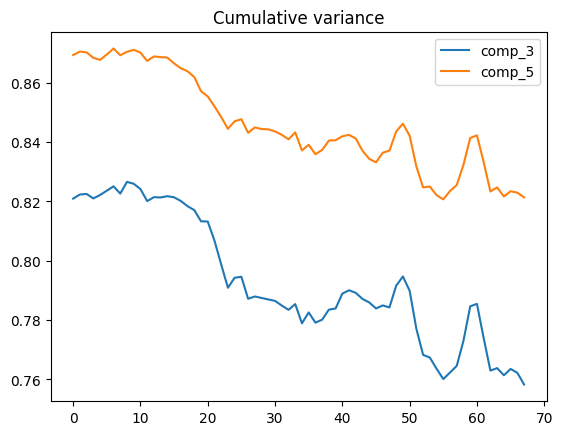

In [61]:
#Cumulative variance of n components
n_comp = 3
list_comp_3 = ["PC" + str(x) for x in range(1, n_comp + 1)]
df_acum_var = pd.DataFrame(df_exp_var_analysis[list_comp_3].sum(axis = 1), 
                           columns = [f"comp_{n_comp}"])

list_comp_5 = ["PC" + str(x) for x in range(1, n_comp + 3)]
df_acum_var[f"comp_{n_comp + 2}"] = df_exp_var_analysis[list_comp_5].sum(axis = 1)

df_acum_var.plot(title= "Cumulative variance")

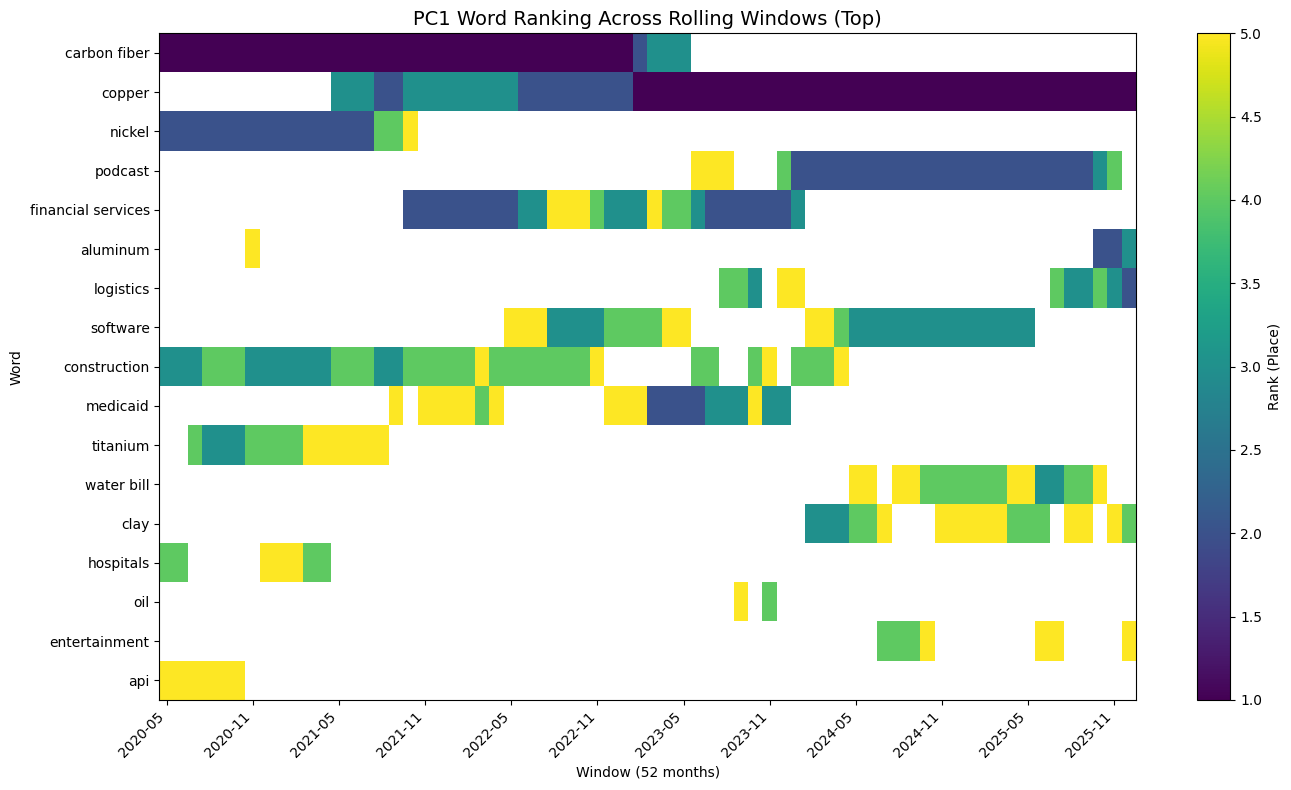

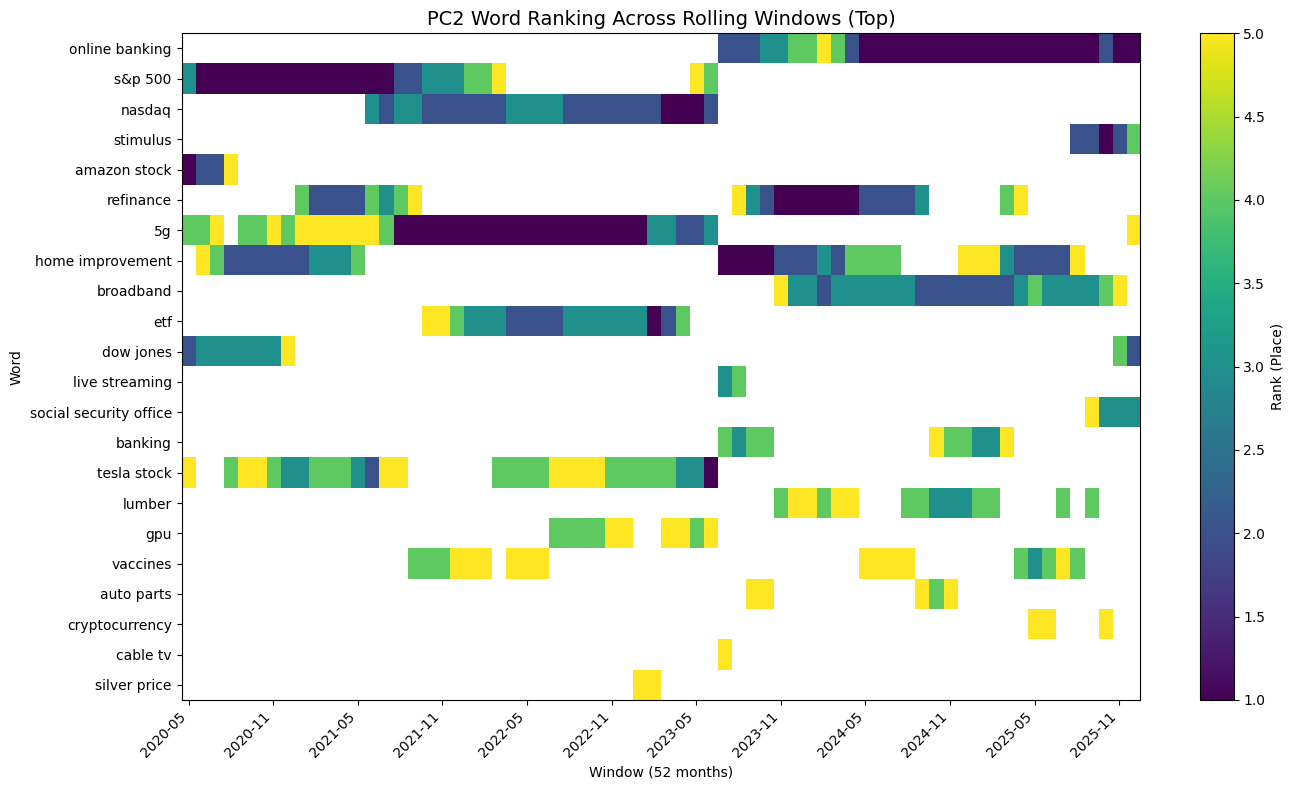

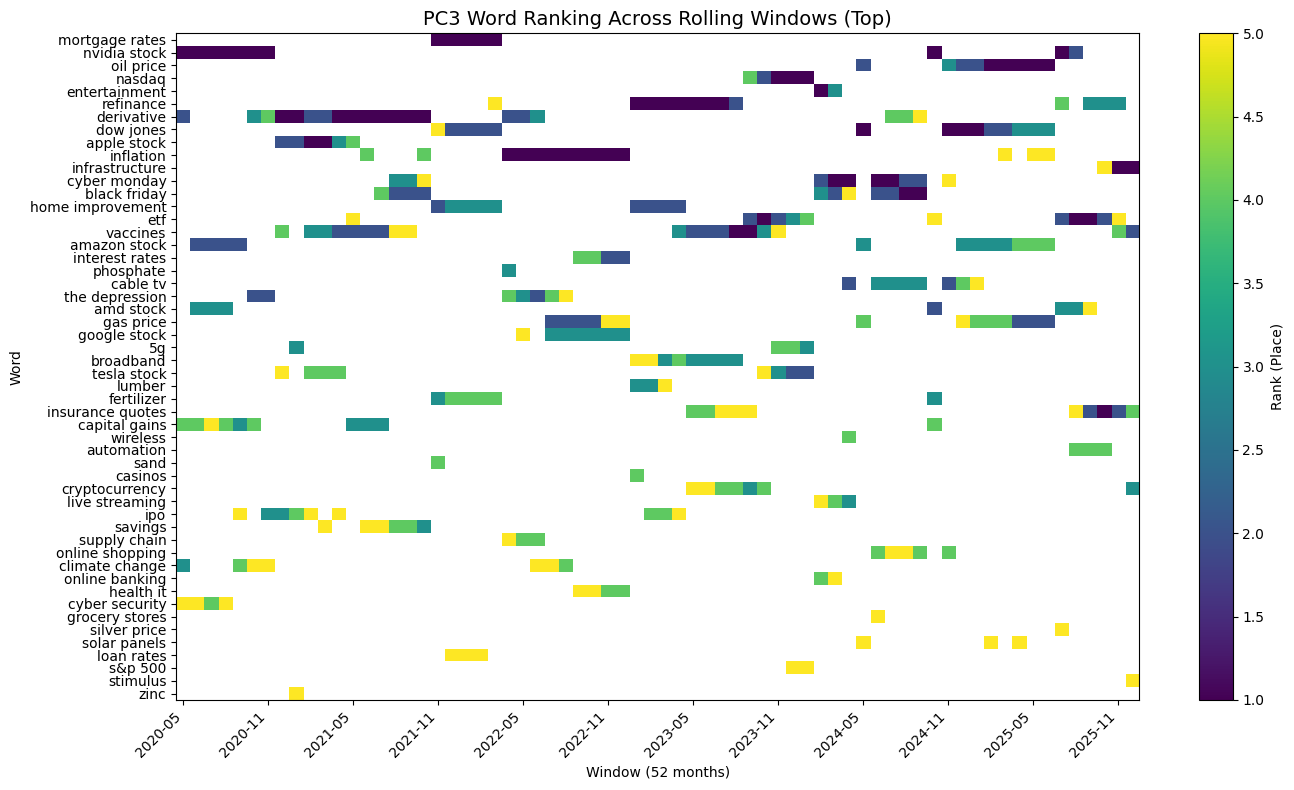

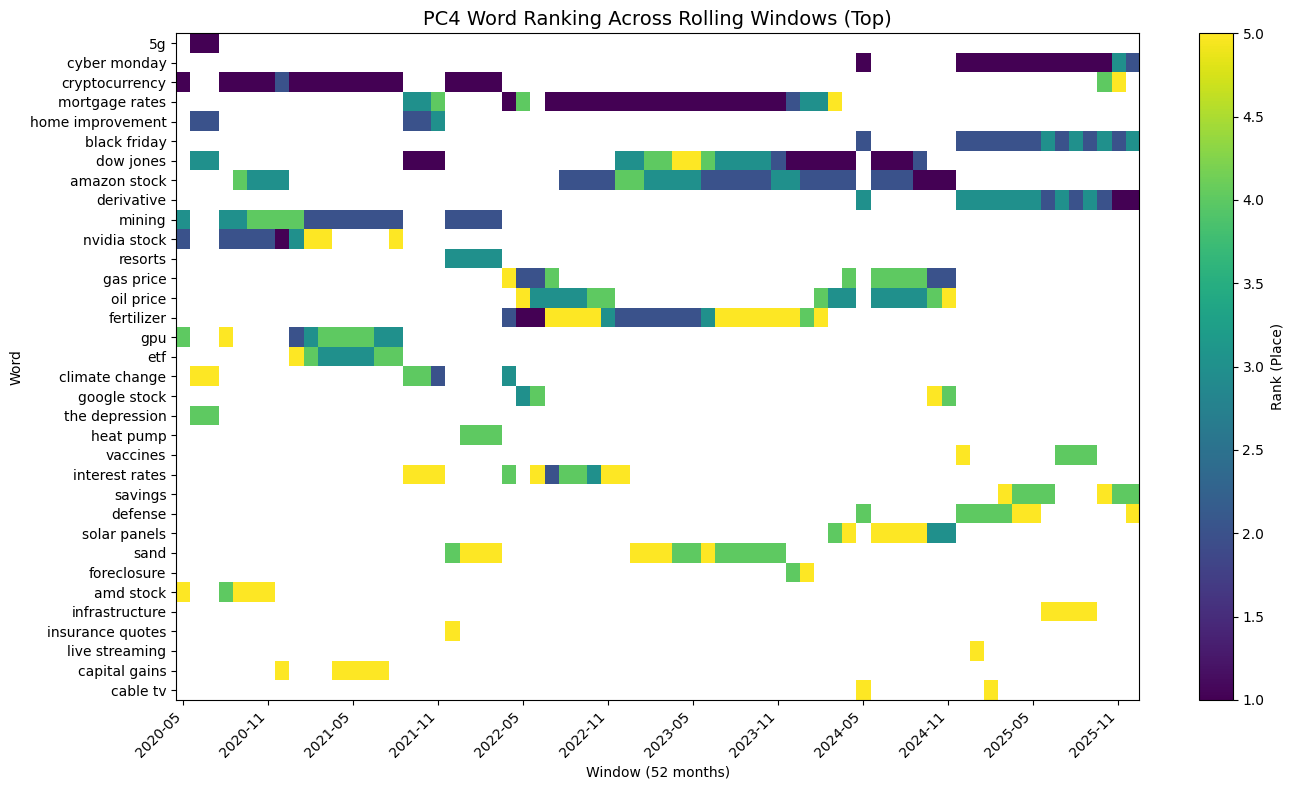

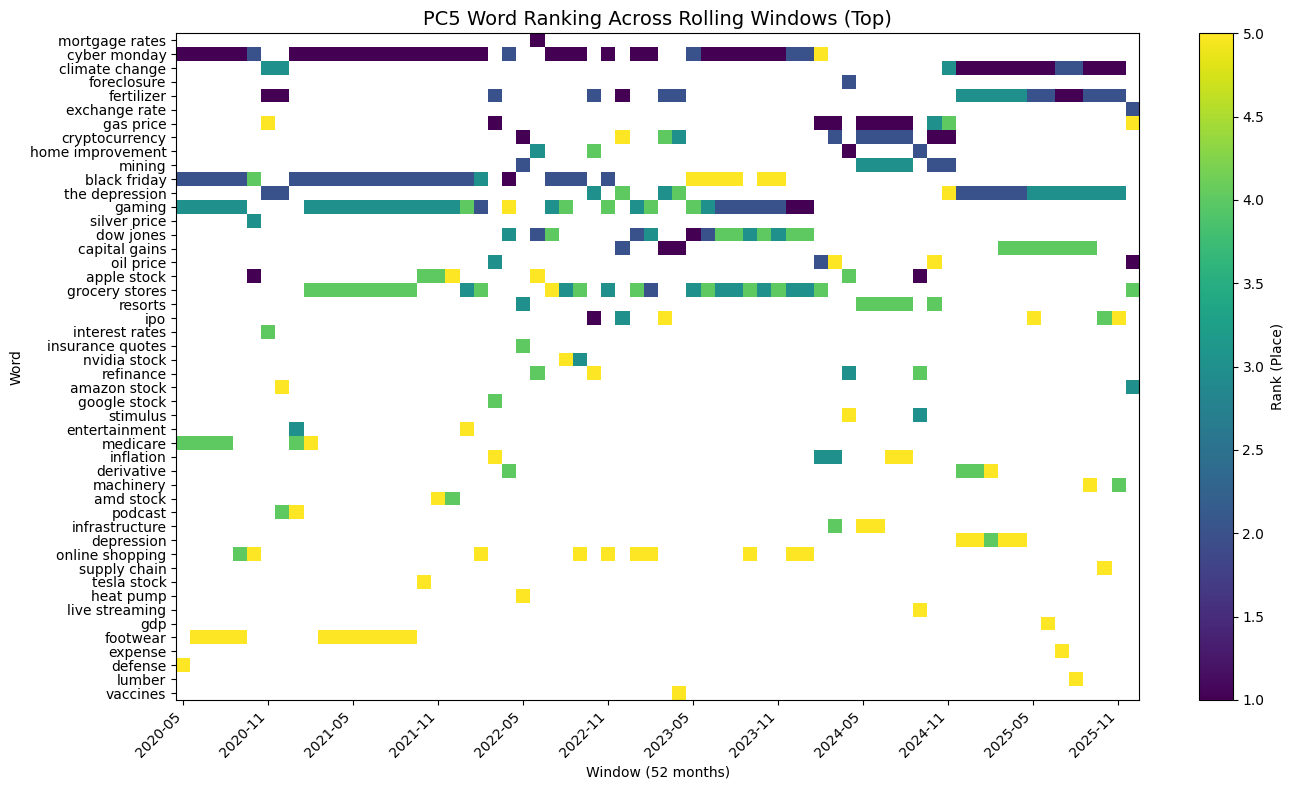

In [62]:
import matplotlib.dates as mdates

pcs = sorted(df_var_up["PCA"].unique())

for pc in pcs:
    df_pc = df_var_up[df_var_up["PCA"] == pc].copy()

    # 1) asegura fechas
    df_pc["window"] = pd.to_datetime(df_pc["window"])

    heatmap_data = df_pc.pivot(index="word", columns="window", values="place")

    # ordenar columnas por fecha
    heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

    # ordenar filas por ranking promedio (ignorando NaNs)
    heatmap_data = heatmap_data.loc[
        heatmap_data.mean(axis=1, skipna=True).sort_values().index
    ]

    # 2) matriz para imshow
    Z = heatmap_data.values.astype(float)

    plt.figure(figsize=(14, 8))
    im = plt.imshow(Z, aspect="auto", interpolation="nearest")
    plt.colorbar(im, label="Rank (Place)")

    plt.title(f"{pc} Word Ranking Across Rolling Windows (Top)", fontsize=14)
    plt.xlabel(f"Window ({rolling_wdw} months)")
    plt.ylabel("Word")

    # 3) ticks: solo cada N fechas
    cols = heatmap_data.columns
    n = len(cols)
    step = max(1, n // 10)  # ~10 labels en x
    tick_pos = np.arange(0, n, step)
    tick_labels = [cols[i].strftime("%Y-%m") for i in tick_pos]

    plt.xticks(tick_pos, tick_labels, rotation=45, ha="right")
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

    plt.tight_layout()
    plt.show()

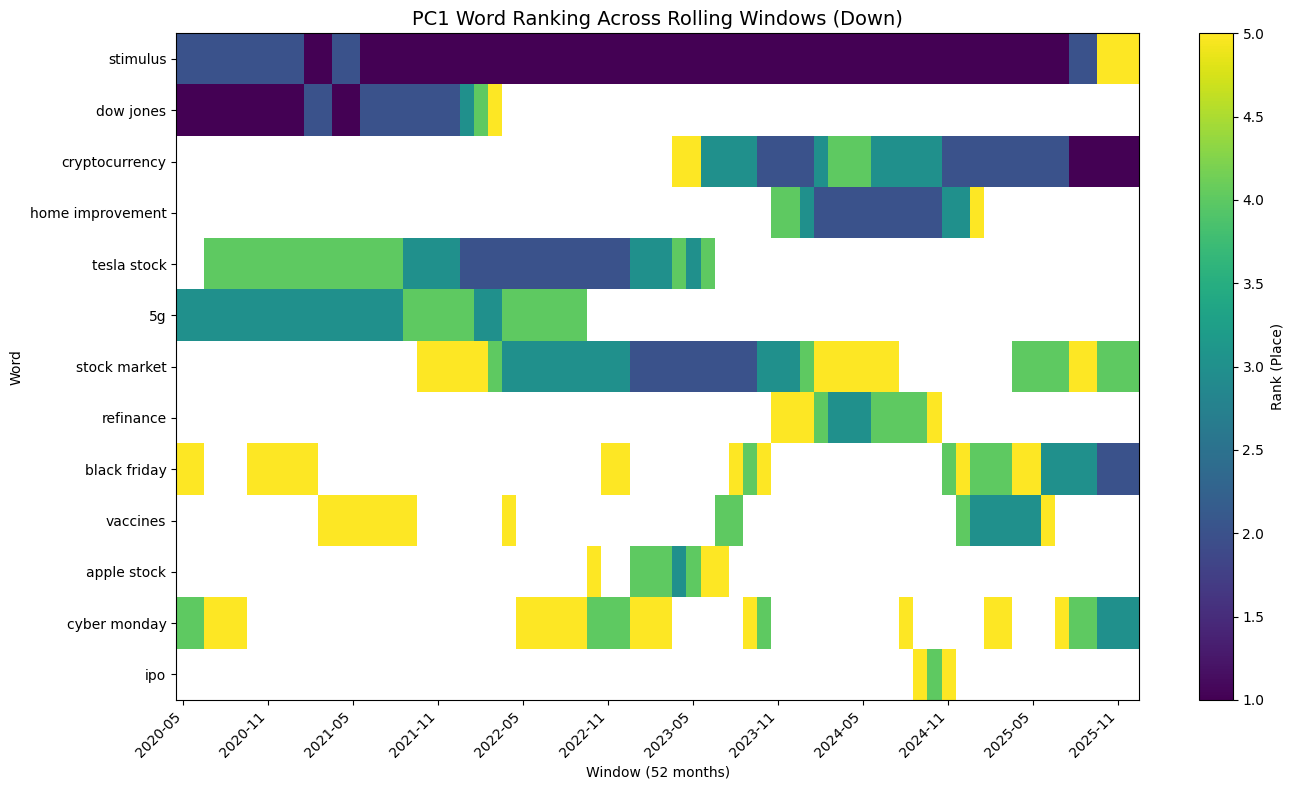

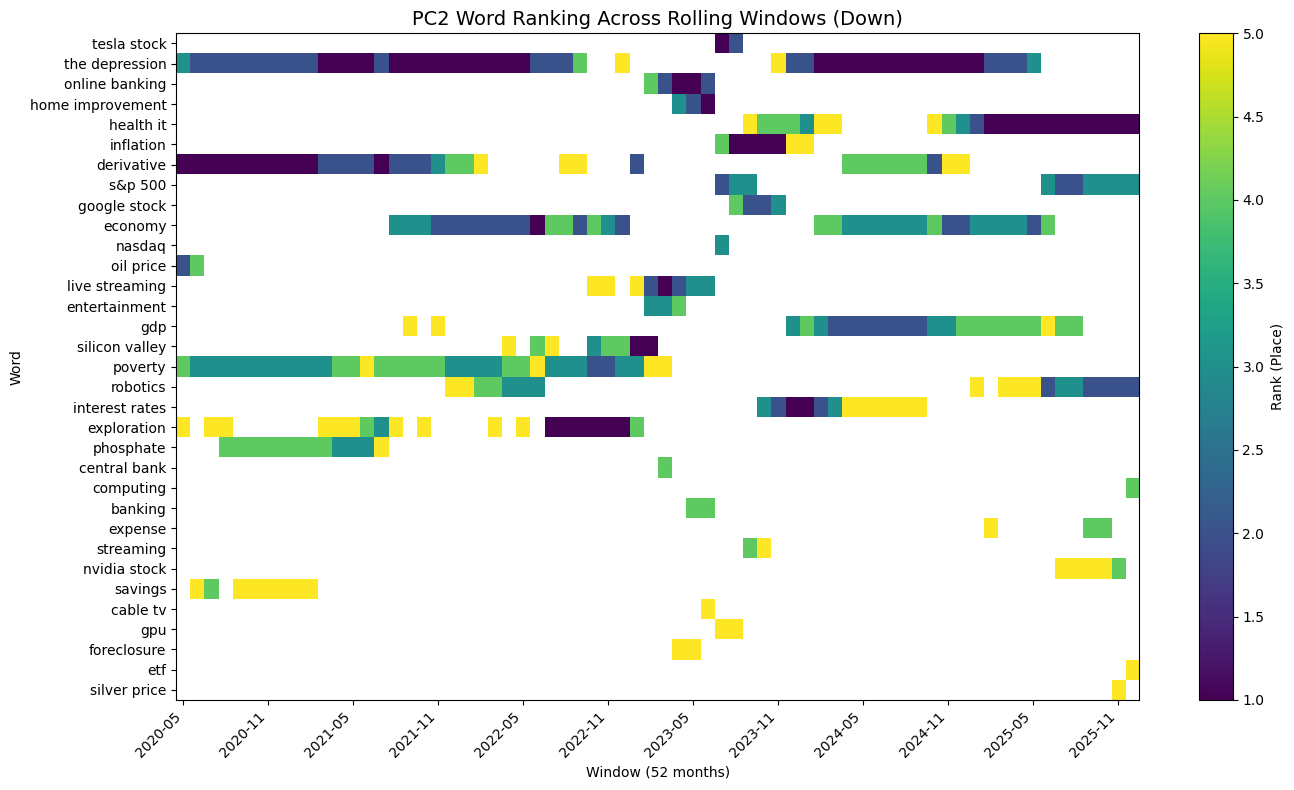

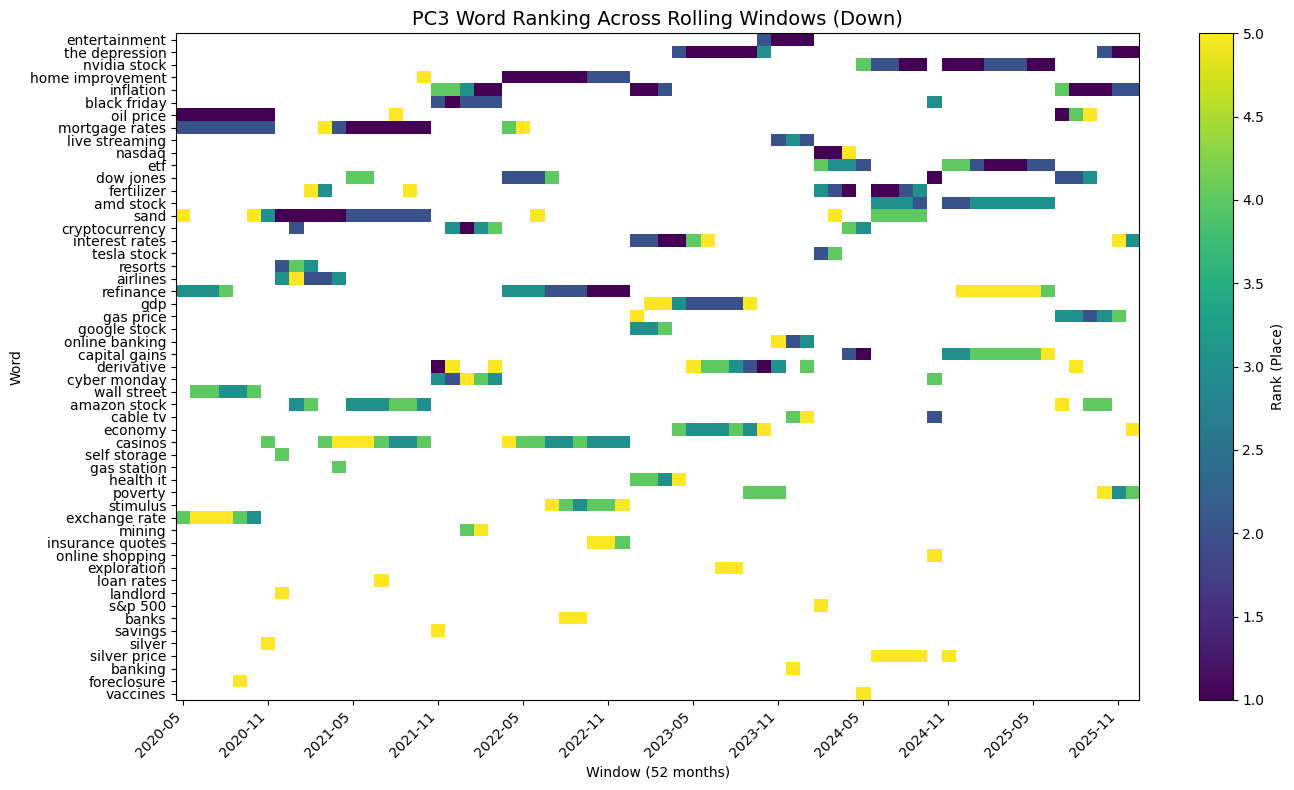

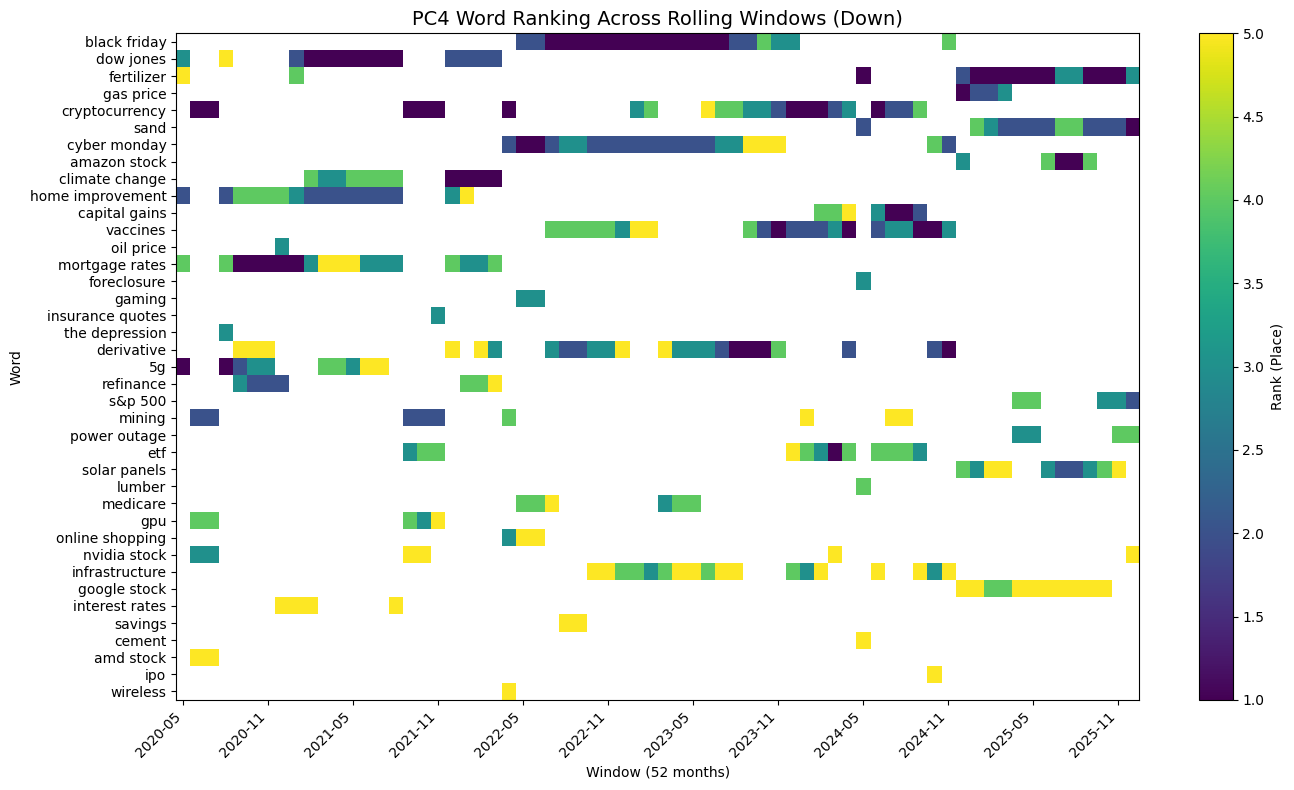

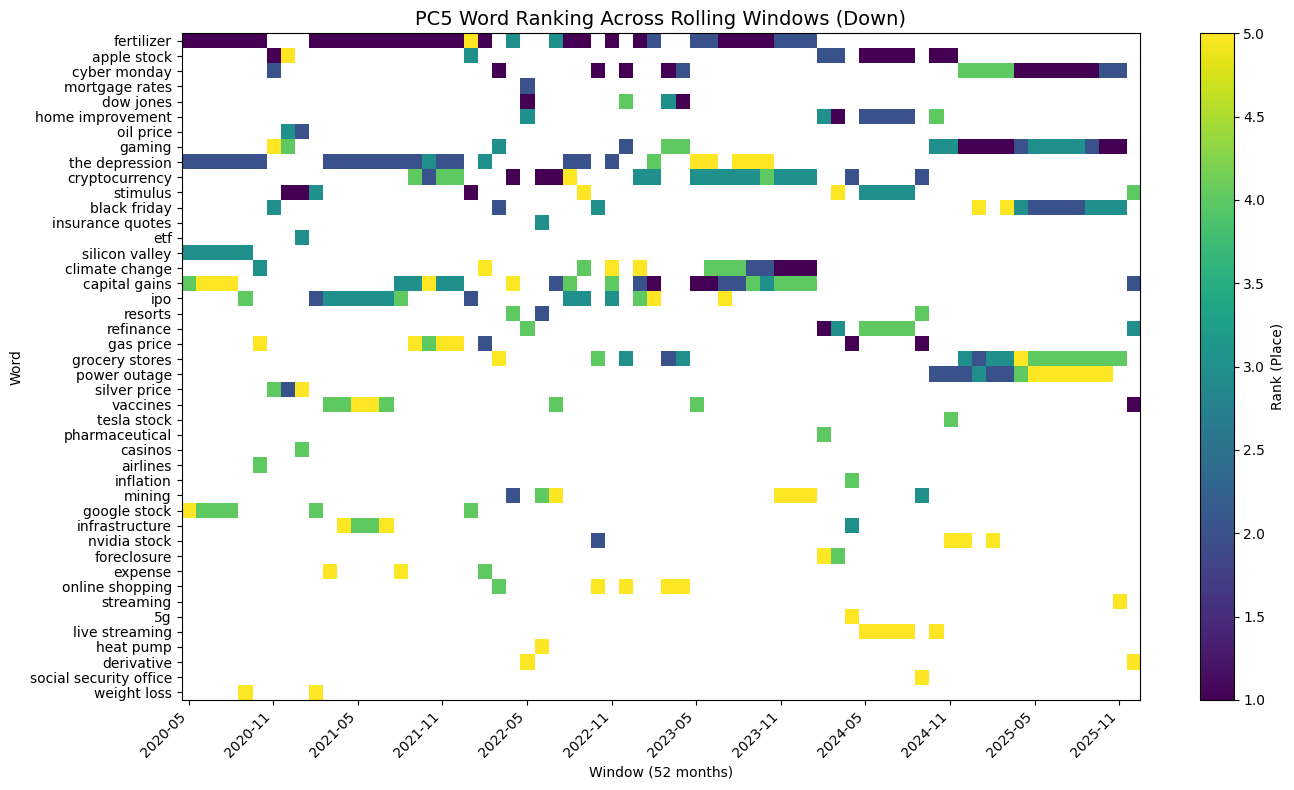

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pcs = sorted(df_var_dwn["PCA"].unique())

for pc in pcs:
    df_pc = df_var_dwn[df_var_dwn["PCA"] == pc].copy()

    # 1) asegura fechas
    df_pc["window"] = pd.to_datetime(df_pc["window"])

    heatmap_data = df_pc.pivot(index="word", columns="window", values="place")

    # ordenar columnas por fecha
    heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

    # ordenar filas por ranking promedio (ignorando NaNs)
    heatmap_data = heatmap_data.loc[
        heatmap_data.mean(axis=1, skipna=True).sort_values().index
    ]

    # 2) matriz para imshow
    Z = heatmap_data.values.astype(float)

    plt.figure(figsize=(14, 8))
    im = plt.imshow(Z, aspect="auto", interpolation="nearest")
    plt.colorbar(im, label="Rank (Place)")

    plt.title(f"{pc} Word Ranking Across Rolling Windows (Down)", fontsize=14)
    plt.xlabel(f"Window ({rolling_wdw} months)")
    plt.ylabel("Word")

    # 3) ticks: solo cada N fechas
    cols = heatmap_data.columns
    n = len(cols)
    step = max(1, n // 10)  # ~10 labels en x
    tick_pos = np.arange(0, n, step)
    tick_labels = [cols[i].strftime("%Y-%m") for i in tick_pos]

    plt.xticks(tick_pos, tick_labels, rotation=45, ha="right")
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

    plt.tight_layout()
    plt.show()

## 3. Linear Regressions

### a) External databases

In [20]:
#Extract database
start = datetime.datetime(2015,12,1)
end = datetime.datetime(2025,12,31)

sp500 = pdr.DataReader("SP500", "fred", start, end)
treasury_10y = pdr.DataReader("DGS10", "fred", start, end)
dxy = pdr.DataReader("DTWEXBGS", "fred", start, end)

In [21]:
df_monthly_first_sp500 = sp500.resample("BMS").first()
df_monthly_first_sp500.index = df_monthly_first_sp500.index.to_period("M").to_timestamp()

df_monthly_first_treasury_10y = treasury_10y.resample("BMS").first()
df_monthly_first_treasury_10y.index = df_monthly_first_treasury_10y.index.to_period("M").to_timestamp()

df_monthly_first_dxy = dxy.resample("BMS").first()
df_monthly_first_dxy.index = df_monthly_first_dxy.index.to_period("M").to_timestamp()

df_monthly_assets = pd.concat([df_monthly_first_sp500, 
                               df_monthly_first_treasury_10y, 
                               df_monthly_first_dxy], axis = 1)

df_monthly_assets_change = df_monthly_assets.copy()
df_monthly_assets_change["SP500"] = df_monthly_assets_change["SP500"].pct_change()
df_monthly_assets_change["DTWEXBGS"] = df_monthly_assets_change["DTWEXBGS"].pct_change()
df_monthly_assets_change["DGS10"] = df_monthly_assets_change["DGS10"].diff()

df_monthly_assets_change = df_monthly_assets_change.dropna()

df_monthly_assets_change_shift = df_monthly_assets_change.shift(-1)
df_monthly_assets_change_shift.dropna(inplace = True)

df_monthly_assets_change.head()

,SP500,DGS10,DTWEXBGS
DATE,,,
2016-03-01,0.023869,-0.14,-0.012196
2016-04-01,0.047732,-0.04,-0.031852
2016-05-01,0.004173,0.09,-0.014748
2016-06-01,0.008600,-0.03,0.034885
2016-07-01,0.001724,-0.39,-0.007212


### b) Regression  against SP500 (In the sample)

#### b.1) Momentum or undereaction

In [22]:
y_variable = "SP500"
X_variable = ["PC1", "PC2", "PC3"]
df_linear_sp = pd.merge(df_monthly_assets_change_shift, df_pcs[X_variable], left_index=True, right_index=True)
df_linear_sp.head()

,SP500,DGS10,DTWEXBGS,PC1,PC2,PC3
2016-03-01,0.047732,-0.04,-0.031852,9.007491,-6.311251,-3.737030
2016-04-01,0.004173,0.09,-0.014748,16.286766,-5.652502,-3.547384
2016-05-01,0.008600,-0.03,0.034885,18.850889,-6.284655,-0.892529
2016-06-01,0.001724,-0.39,-0.007212,1.935227,-6.743347,0.160534
2016-07-01,0.032283,0.05,0.002909,17.020867,-7.067035,2.527229


In [23]:
y = df_linear_sp[y_variable]
X = df_linear_sp[X_variable]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

df_params = pd.DataFrame({
    "coef": model.params,
    "tstat": model.tvalues,
    "pval": model.pvalues
})
df_params

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.768
Date:                Fri, 27 Feb 2026   Prob (F-statistic):              0.157
Time:                        15:21:02   Log-Likelihood:                 197.57
No. Observations:                 117   AIC:                            -387.1
Df Residuals:                     113   BIC:                            -376.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0114      0.004      2.700      0.0

,coef,tstat,pval
const,0.011368,2.700406,0.007991
PC1,0.000702,1.639775,0.103833
PC2,0.000749,0.782147,0.435764
PC3,0.002245,1.448435,0.150265


#### b.2) Overeaction

In [24]:
df_monthly_assets_change_shift2 = df_monthly_assets_change.shift(-2)
df_monthly_assets_change_shift2.dropna(inplace = True)

df_linear_sp2 = pd.merge(df_monthly_assets_change_shift2, df_pcs[X_variable], left_index=True, right_index=True)
df_linear_sp2.head()

,SP500,DGS10,DTWEXBGS,PC1,PC2,PC3
2016-03-01,0.004173,0.09,-0.014748,9.007491,-6.311251,-3.737030
2016-04-01,0.008600,-0.03,0.034885,16.286766,-5.652502,-3.547384
2016-05-01,0.001724,-0.39,-0.007212,18.850889,-6.284655,-0.892529
2016-06-01,0.032283,0.05,0.002909,1.935227,-6.743347,0.160534
2016-07-01,0.000009,0.06,0.001765,17.020867,-7.067035,2.527229


In [25]:
y = df_linear_sp2[y_variable]
X = df_linear_sp2[X_variable]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

df_params = pd.DataFrame({
    "coef": model.params,
    "tstat": model.tvalues,
    "pval": model.pvalues
})
df_params

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3744
Date:                Fri, 27 Feb 2026   Prob (F-statistic):              0.772
Time:                        15:30:23   Log-Likelihood:                 193.61
No. Observations:                 116   AIC:                            -379.2
Df Residuals:                     112   BIC:                            -368.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0115      0.004      2.669      0.0

,coef,tstat,pval
const,0.011519,2.669262,0.008732
PC1,-0.000436,-0.996774,0.321023
PC2,-0.000106,-0.107992,0.914195
PC3,-0.000580,-0.361492,0.718413


### c) Regression  against SP500 (Out of the sample)

In [ ]:
rolling_wdw = 52
X_variables = ["PC1", "PC2", "PC3"]
y_variable = "SP500"

# Guardar resultados OOS
oos_pred_1, oos_true_1, oos_date_1 = [], [], []
oos_pred_2, oos_true_2, oos_date_2 = [], [], []

for i in range(len(df_monthly_assets_change) - (rolling_wdw + 2)):

    # ===============================
    # 1) Creating windows
    # ===============================
    train_idx = df_monthly_assets_change.index[i : i + rolling_wdw]
    t_idx     = df_monthly_assets_change.index[i + rolling_wdw]
    t1_idx    = df_monthly_assets_change.index[i + rolling_wdw + 1]
    t2_idx    = df_monthly_assets_change.index[i + rolling_wdw + 2]

    # ===============================
    # 2) PCA TRAIN
    # ===============================
    df_words_train = df_words.loc[train_idx].copy()

    pca_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=3))
    ])

    pca_pipe.fit(df_words_train.values)

    pcs_train = pca_pipe.transform(df_words_train.values)

    df_pcs_train = pd.DataFrame(
        pcs_train,
        index=train_idx,
        columns=X_variables
    )

    # ===============================
    # 3) Fitting train
    # ===============================
    # t+1
    y_train_1 = df_monthly_assets_change.loc[train_idx, y_variable].shift(-1).dropna()
    X_train_1 = df_pcs_train.loc[y_train_1.index]

    X_train_1 = sm.add_constant(X_train_1, has_constant='add')

    model1 = sm.OLS(y_train_1, X_train_1).fit()

    # t+2
    y_train_2 = df_monthly_assets_change.loc[train_idx, y_variable].shift(-2).dropna()
    X_train_2 = df_pcs_train.loc[y_train_2.index]

    X_train_2 = sm.add_constant(X_train_2, has_constant='add')

    model2 = sm.OLS(y_train_2, X_train_2).fit()

    # ===============================
    # 4) OOS prediction
    # ===============================
    # Calcular PC_t usando PCA entrenado
    x_words_t = df_words.loc[[t_idx]].values
    pc_t = pca_pipe.transform(x_words_t)

    X_oos = pd.DataFrame(pc_t, index=[t_idx], columns=X_variables)
    X_oos = sm.add_constant(X_oos, has_constant='add')

    # 🔥 Forzar alineación perfecta
    X_oos_1 = X_oos.reindex(columns=model1.params.index, fill_value=0)
    X_oos_2 = X_oos.reindex(columns=model2.params.index, fill_value=0)

    yhat_1 = model1.predict(X_oos_1).to_numpy().item()
    yhat_2 = model2.predict(X_oos_2).to_numpy().item()

    ytrue_1 = float(df_monthly_assets_change.loc[t1_idx, y_variable])
    ytrue_2 = float(df_monthly_assets_change.loc[t2_idx, y_variable])

    oos_pred_1.append(yhat_1)
    oos_true_1.append(ytrue_1)
    oos_date_1.append(t1_idx)

    oos_pred_2.append(yhat_2)
    oos_true_2.append(ytrue_2)
    oos_date_2.append(t2_idx)

# ===================================
# 5) Construir DataFrames OOS
# ===================================
df_oos_1 = pd.DataFrame({
    "y_true": oos_true_1,
    "y_pred": oos_pred_1
}, index=pd.to_datetime(oos_date_1)).sort_index()

df_oos_2 = pd.DataFrame({
    "y_true": oos_true_2,
    "y_pred": oos_pred_2
}, index=pd.to_datetime(oos_date_2)).sort_index()

# ===================================
# 6) OOS R²
# ===================================
def oos_r2(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    y_bar = y_true.mean()
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_bar)**2)

r2_oos_1 = oos_r2(df_oos_1["y_true"], df_oos_1["y_pred"])
r2_oos_2 = oos_r2(df_oos_2["y_true"], df_oos_2["y_pred"])

print("OOS R2 (t+1):", r2_oos_1)
print("OOS R2 (t+2):", r2_oos_2)

OOS R2 (t+1): -0.16855905599917054
OOS R2 (t+2): -0.186905645504865
